# [E-05]Rock_scissor_paper

## Import

In [498]:
from tensorflow import keras
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt

from PIL import Image
import random
import glob
import os

## 데이터 불러오기 + Resize 하기

### Reszie 하는 함수 구현

In [499]:
def resize_images(img_path):
    images = glob.glob(img_path + "/*.jpg")

    target_size = (28, 28)
    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), "개의 이미지 Resize 완료")

### Scissor Image Read or Resize

In [500]:
image_scissor_path = os.getenv("homepath") + "/Desktop/python/exploration/exploration_11_22/image/scissor"
resize_images(image_scissor_path)

100 개의 이미지 Resize 완료


C:\Users\ASUS\AppData\Local\Temp\ipykernel_12736\3474973197.py:7: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  new_img = old_img.resize(target_size, Image.ANTIALIAS)


### Rock Image Read or Resize

In [501]:
image_rock_path = os.getenv("homepath") + "/Desktop/python/exploration/exploration_11_22/image/rock"
resize_images(image_rock_path)

100 개의 이미지 Resize 완료


C:\Users\ASUS\AppData\Local\Temp\ipykernel_12736\3474973197.py:7: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  new_img = old_img.resize(target_size, Image.ANTIALIAS)


### Paper Image Read or Resize

In [502]:
image_paper_path = os.getenv("homepath") + "/Desktop/python/exploration/exploration_11_22/image/paper"
resize_images(image_paper_path)

100 개의 이미지 Resize 완료


C:\Users\ASUS\AppData\Local\Temp\ipykernel_12736\3474973197.py:7: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  new_img = old_img.resize(target_size, Image.ANTIALIAS)


### 데이터 읽는 함수 구현

In [503]:
def load_data(image_path, number_of_data = 300):
    img_size = 28 # 28x28
    color = 3 # RGB 값
    
    imgs = np.zeros(number_of_data*img_size*img_size*color, dtype=np.int32).reshape(number_of_data, img_size, img_size, color)
    labels = np.zeros(number_of_data, dtype=np.int32)

    idx = 0
    # 가위
    for file in glob.iglob(image_path + '/scissor/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx, :, :, :] = img # 데이터영역에 이미지 행렬 복사
        labels[idx] = 0
        idx = idx+1
    
    # 바위
    for file in glob.iglob(image_path + '/rock/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx, :, :, :] = img # 데이터영역에 이미지 행렬 복사
        labels[idx] = 1
        idx = idx+1

    # 보
    for file in glob.iglob(image_path + '/paper/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx, :, :, :] = img # 데이터영역에 이미지 행렬 복사
        labels[idx] = 2
        idx = idx+1

    print("데이터의 이미지 개수 : ", idx)
    return imgs, labels

In [504]:
image_path = os.getenv("homepath") + '/Desktop/python/exploration/exploration_11_22/image'
(x_train, y_train) = load_data(image_path)
x_train_norm = x_train/255.0 # 0 ~ 1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

데이터의 이미지 개수 :  300
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


### 이미지 확인

라벨 :  0


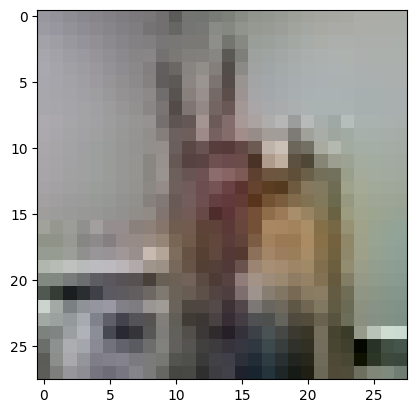

In [505]:
plt.imshow(x_train[0])
print("라벨 : ", y_train[0])

## 딥러닝 네트워크 설계하기

In [506]:
n_channel_1 = 24
n_channel_2 = 48
n_dense = 50
n_train_epoch = 20

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3, 3), activation='relu', input_shape=(28, 28, 3)))
model.add(keras.layers.MaxPool2D(2, 2))
model.add(keras.layers.Conv2D(n_channel_2, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_53"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_106 (Conv2D)         (None, 26, 26, 24)        672       
                                                                 
 max_pooling2d_105 (MaxPooli  (None, 13, 13, 24)       0         
 ng2D)                                                           
                                                                 
 conv2d_107 (Conv2D)         (None, 11, 11, 48)        10416     
                                                                 
 max_pooling2d_106 (MaxPooli  (None, 5, 5, 48)         0         
 ng2D)                                                           
                                                                 
 flatten_49 (Flatten)        (None, 1200)              0         
                                                                 
 dense_98 (Dense)            (None, 50)              

In [507]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

model.fit(x_train_norm, y_train, epochs=20)

Epoch 1/20
10/10 [==============================] - 1s 10ms/step - loss: 1.0932 - accuracy: 0.4233
Epoch 2/20
10/10 [==============================] - 0s 8ms/step - loss: 1.0648 - accuracy: 0.3867
Epoch 3/20
10/10 [==============================] - 0s 9ms/step - loss: 1.0244 - accuracy: 0.5633
Epoch 4/20
10/10 [==============================] - 0s 9ms/step - loss: 0.9485 - accuracy: 0.6600
Epoch 5/20
10/10 [==============================] - 0s 9ms/step - loss: 0.8495 - accuracy: 0.6800
Epoch 6/20
10/10 [==============================] - 0s 9ms/step - loss: 0.6950 - accuracy: 0.8333
Epoch 7/20
10/10 [==============================] - 0s 10ms/step - loss: 0.5116 - accuracy: 0.9233
Epoch 8/20
10/10 [==============================] - 0s 10ms/step - loss: 0.3892 - accuracy: 0.9333
Epoch 9/20
10/10 [==============================] - 0s 9ms/step - loss: 0.3124 - accuracy: 0.9300
Epoch 10/20
10/10 [==============================] - 0s 8ms/step - loss: 0.2659 - accuracy: 0.9233
Epoch 11/20
10/1

## 얼마나 잘 만들었는지 확인하기(테스트)

### Test 데이터 생성

### Test Scissor Data

In [508]:
t_image_scissor_path = os.getenv("homepath") + "/Desktop/python/exploration/exploration_11_22/test1/scissor"
resize_images(t_image_scissor_path)

100 개의 이미지 Resize 완료


C:\Users\ASUS\AppData\Local\Temp\ipykernel_12736\3474973197.py:7: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  new_img = old_img.resize(target_size, Image.ANTIALIAS)


### Test Paper Data

In [509]:
t_image_paper_path = os.getenv("homepath") + "/Desktop/python/exploration/exploration_11_22/test1/paper"
resize_images(t_image_paper_path)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12736\3474973197.py:7: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  new_img = old_img.resize(target_size, Image.ANTIALIAS)


100 개의 이미지 Resize 완료


### Test Rock Data

In [510]:
t_image_rock_path = os.getenv("homepath") + "/Desktop/python/exploration/exploration_11_22/test1/rock"
resize_images(t_image_rock_path)

100 개의 이미지 Resize 완료


C:\Users\ASUS\AppData\Local\Temp\ipykernel_12736\3474973197.py:7: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  new_img = old_img.resize(target_size, Image.ANTIALIAS)


### 테스트 데이터 읽는 함수 구현

In [511]:
def load_data(image_path, number_of_data = 300):
    img_size = 28 # 28x28
    color = 3 # RGB 값
    
    imgs = np.zeros(number_of_data*img_size*img_size*color, dtype=np.int32).reshape(number_of_data, img_size, img_size, color)
    labels = np.zeros(number_of_data, dtype=np.int32)

    idx = 0
    # 가위
    for file in glob.iglob(image_path + '/scissor/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx, :, :, :] = img # 데이터영역에 이미지 행렬 복사
        labels[idx] = 0
        idx = idx+1
    
    # 바위
    for file in glob.iglob(image_path + '/rock/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx, :, :, :] = img # 데이터영역에 이미지 행렬 복사
        labels[idx] = 1
        idx = idx+1

    # 보
    for file in glob.iglob(image_path + '/paper/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx, :, :, :] = img # 데이터영역에 이미지 행렬 복사
        labels[idx] = 2
        idx = idx+1

    print("데이터의 이미지 개수 : ", idx)
    return imgs, labels

In [512]:
test_image_path = os.getenv("homepath") + '/Desktop/python/exploration/exploration_11_22/test1'
(x_test, y_test) = load_data(test_image_path)
x_test_norm = x_test/255.0 # 0 ~ 1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

데이터의 이미지 개수 :  300
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


### 이미지 확인

라벨 :  0


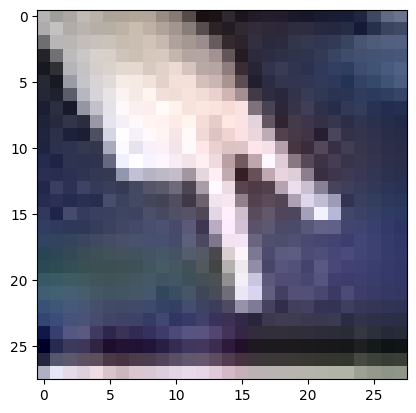

In [513]:
plt.imshow(x_test[0])
print("라벨 : ", y_test[0])

### 테스트 데이터로 성능을 확인

In [514]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=1)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

10/10 [==============================] - 0s 5ms/step - loss: 4.5185 - accuracy: 0.2733
test_loss: 4.518516540527344
test_accuracy: 0.273333340883255


### 추론 및 시각화

In [515]:
predicted = model.predict(x_test_norm)
predicted_labels = np.argmax(predicted, axis=1)

idx = 87
print('Predict 결과 : ', predicted[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

10/10 [==============================] - 0s 4ms/step
Predict 결과 :  [9.9616349e-01 2.3090113e-05 3.8134931e-03]
model이 추론한 가장 가능성이 높은 결과 :  0
실제 데이터의 라벨 :  0


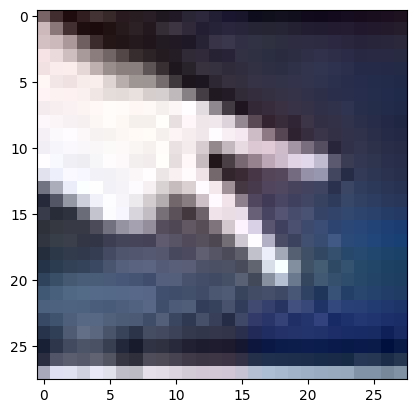

In [516]:
plt.imshow(x_test[idx], cmap=plt.cm.binary)
plt.show()

예측확률분포: [4.4042096e-01 1.5934231e-05 5.5956316e-01]
라벨: 0, 예측결과: 2


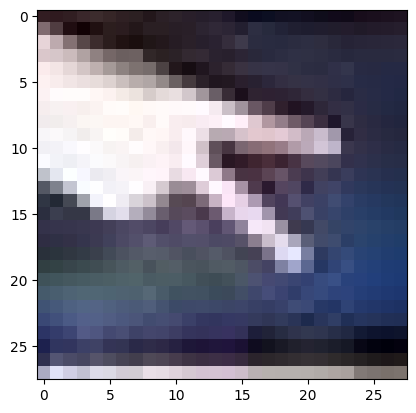

예측확률분포: [9.9639088e-01 3.0780002e-03 5.3110719e-04]
라벨: 2, 예측결과: 0


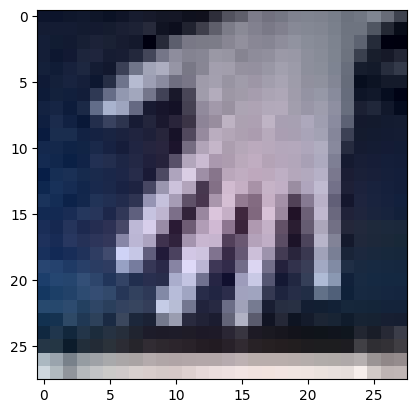

예측확률분포: [0.00140926 0.00723389 0.99135685]
라벨: 0, 예측결과: 2


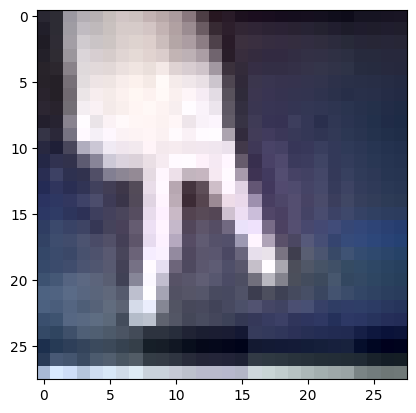

예측확률분포: [9.9639088e-01 3.0780002e-03 5.3110719e-04]
라벨: 2, 예측결과: 0


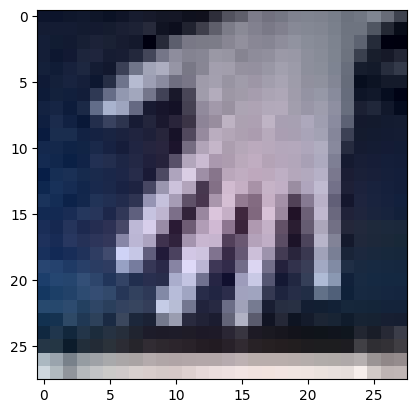

예측확률분포: [9.7198504e-01 3.6943824e-05 2.7978035e-02]
라벨: 1, 예측결과: 0


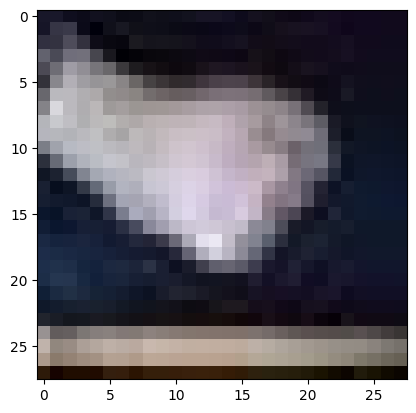

예측확률분포: [0.9927684  0.00396221 0.00326931]
라벨: 1, 예측결과: 0


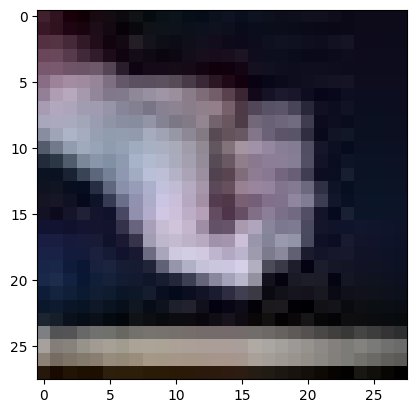

예측확률분포: [5.8581468e-02 1.4363947e-05 9.4140416e-01]
라벨: 1, 예측결과: 2


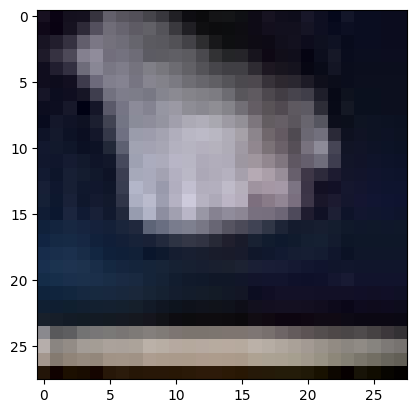

예측확률분포: [1.4956516e-01 4.7851433e-08 8.5043478e-01]
라벨: 0, 예측결과: 2


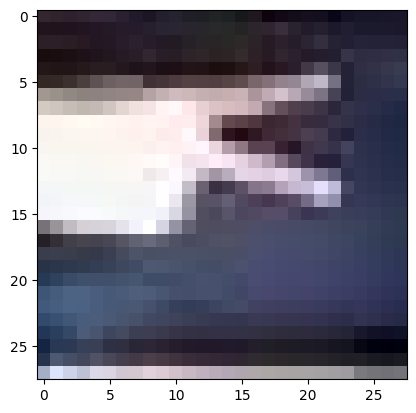

예측확률분포: [9.9707937e-01 2.2521564e-03 6.6853233e-04]
라벨: 2, 예측결과: 0


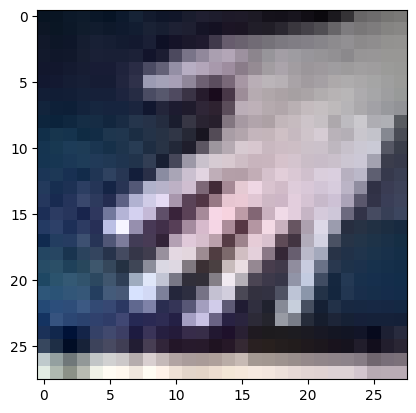

예측확률분포: [3.6102582e-02 1.0336004e-05 9.6388710e-01]
라벨: 1, 예측결과: 2


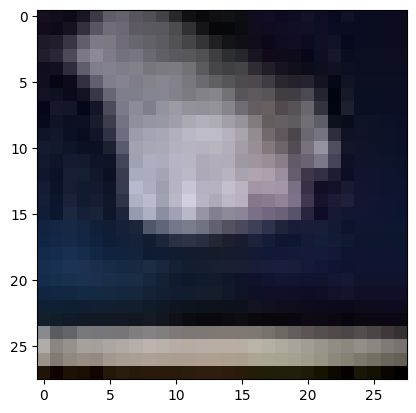

In [517]:
out_predict_list=[]
for i, _ in enumerate(predicted_labels):
    if predicted_labels[i] != y_test[i]:
        out_predict_list.append(i)

samples = random.choices(population=out_predict_list, k=10)

for n in samples:
    print("예측확률분포: " + str(predicted[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

### 하이퍼파라미터 변경으로 인한 성능 재테스트

In [529]:
n_channel_1 = 24
n_channel_2 = 48
n_dense = 70

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3, 3), padding = 'same', activation='relu', input_shape=(28, 28, 3)))
model.add(keras.layers.MaxPool2D(3, 3))
model.add(keras.layers.Conv2D(n_channel_2, (3, 3), padding = 'same', activation='relu'))
model.add(keras.layers.MaxPooling2D((3, 3)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_55"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_110 (Conv2D)         (None, 28, 28, 24)        672       
                                                                 
 max_pooling2d_109 (MaxPooli  (None, 9, 9, 24)         0         
 ng2D)                                                           
                                                                 
 conv2d_111 (Conv2D)         (None, 9, 9, 48)          10416     
                                                                 
 max_pooling2d_110 (MaxPooli  (None, 3, 3, 48)         0         
 ng2D)                                                           
                                                                 
 flatten_51 (Flatten)        (None, 432)               0         
                                                                 
 dense_102 (Dense)           (None, 70)              

### Train

In [530]:
n_train_epoch = 40

model.compile(optimizer = 'Adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

model.fit(x_train_norm, y_train, epochs=n_train_epoch)

Epoch 1/40
57/57 [==============================] - 1s 9ms/step - loss: 1.0790 - accuracy: 0.4133
Epoch 2/40
57/57 [==============================] - 1s 9ms/step - loss: 0.9314 - accuracy: 0.5594
Epoch 3/40
57/57 [==============================] - 1s 9ms/step - loss: 0.7279 - accuracy: 0.7106
Epoch 4/40
57/57 [==============================] - 1s 9ms/step - loss: 0.5554 - accuracy: 0.7778
Epoch 5/40
57/57 [==============================] - 1s 9ms/step - loss: 0.3983 - accuracy: 0.8622
Epoch 6/40
57/57 [==============================] - 1s 10ms/step - loss: 0.2940 - accuracy: 0.9072
Epoch 7/40
57/57 [==============================] - 1s 11ms/step - loss: 0.1973 - accuracy: 0.9489
Epoch 8/40
57/57 [==============================] - 1s 10ms/step - loss: 0.1847 - accuracy: 0.9433
Epoch 9/40
57/57 [==============================] - 1s 11ms/step - loss: 0.1238 - accuracy: 0.9706
Epoch 10/40
57/57 [==============================] - 1s 12ms/step - loss: 0.0875 - accuracy: 0.9839
Epoch 11/40
57

### Test

In [531]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=1)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

10/10 [==============================] - 0s 4ms/step - loss: 2.2526 - accuracy: 0.6867
test_loss: 2.252588987350464
test_accuracy: 0.6866666674613953


각각 100장의 image 데이터셋이 주어졌을 때의 accuracy 는 약 0.68 정도의 값이 나옴

## 데이터셋이 각각 300장의 image 데이터셋이 있을때라면..?

### Resize 는 모두 28x28로 동일하게 미리 진행완료

In [532]:
def load_data(image_path, number_of_data = 900):
    img_size = 28 # 28x28
    color = 3 # RGB 값
    
    imgs = np.zeros(number_of_data*img_size*img_size*color, dtype=np.int32).reshape(number_of_data, img_size, img_size, color)
    labels = np.zeros(number_of_data, dtype=np.int32)

    idx = 0
    # 가위
    for file in glob.iglob(image_path + '/scissor_300/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx, :, :, :] = img # 데이터영역에 이미지 행렬 복사
        labels[idx] = 0
        idx = idx+1
    
    # 바위
    for file in glob.iglob(image_path + '/rock_300/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx, :, :, :] = img # 데이터영역에 이미지 행렬 복사
        labels[idx] = 1
        idx = idx+1

    # 보
    for file in glob.iglob(image_path + '/paper_300/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx, :, :, :] = img # 데이터영역에 이미지 행렬 복사
        labels[idx] = 2
        idx = idx+1

    print("데이터의 이미지 개수 : ", idx)
    return imgs, labels

In [533]:
image_path = os.getenv("homepath") + '/Desktop/python/exploration/exploration_11_22/image'
(x_train, y_train) = load_data(image_path)
x_train_norm = x_train/255.0 # 0 ~ 1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

데이터의 이미지 개수 :  900
x_train shape: (900, 28, 28, 3)
y_train shape: (900,)


In [534]:
n_train_epoch = 40

model.compile(optimizer = 'Adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

model.fit(x_train_norm, y_train, epochs=n_train_epoch)

Epoch 1/40
29/29 [==============================] - 1s 9ms/step - loss: 0.0940 - accuracy: 0.9667
Epoch 2/40
29/29 [==============================] - 0s 9ms/step - loss: 0.0126 - accuracy: 0.9978
Epoch 3/40
29/29 [==============================] - 0s 10ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 4/40
29/29 [==============================] - 0s 11ms/step - loss: 8.1925e-04 - accuracy: 1.0000
Epoch 5/40
29/29 [==============================] - 0s 10ms/step - loss: 7.2585e-04 - accuracy: 1.0000
Epoch 6/40
29/29 [==============================] - 0s 11ms/step - loss: 6.7822e-04 - accuracy: 1.0000
Epoch 7/40
29/29 [==============================] - 0s 10ms/step - loss: 6.5486e-04 - accuracy: 1.0000
Epoch 8/40
29/29 [==============================] - 0s 11ms/step - loss: 6.0792e-04 - accuracy: 1.0000
Epoch 9/40
29/29 [==============================] - 0s 10ms/step - loss: 5.7892e-04 - accuracy: 1.0000
Epoch 10/40
29/29 [==============================] - 0s 9ms/step - loss: 5.5734e-04 - a

In [535]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=1)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

10/10 [==============================] - 0s 4ms/step - loss: 2.4095 - accuracy: 0.7033
test_loss: 2.409466505050659
test_accuracy: 0.70333331823349


각각 300장의 image 데이터셋이 주어졌을 때의 accuracy 는 약 0.70 정도의 값이 나옴

## 데이터셋이 각각 600장의 image 데이터셋이 있을때라면..?

In [536]:
def load_data(image_path, number_of_data = 1800):
    img_size = 28 # 28x28
    color = 3 # RGB 값
    
    imgs = np.zeros(number_of_data*img_size*img_size*color, dtype=np.int32).reshape(number_of_data, img_size, img_size, color)
    labels = np.zeros(number_of_data, dtype=np.int32)

    idx = 0
    # 가위
    for file in glob.iglob(image_path + '/scissor_600/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx, :, :, :] = img # 데이터영역에 이미지 행렬 복사
        labels[idx] = 0
        idx = idx+1
    
    # 바위
    for file in glob.iglob(image_path + '/rock_600/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx, :, :, :] = img # 데이터영역에 이미지 행렬 복사
        labels[idx] = 1
        idx = idx+1

    # 보
    for file in glob.iglob(image_path + '/paper_600/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx, :, :, :] = img # 데이터영역에 이미지 행렬 복사
        labels[idx] = 2
        idx = idx+1

    print("데이터의 이미지 개수 : ", idx)
    return imgs, labels

In [537]:
image_path = os.getenv("homepath") + '/Desktop/python/exploration/exploration_11_22/image'
(x_train, y_train) = load_data(image_path)
x_train_norm = x_train/255.0 # 0 ~ 1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

데이터의 이미지 개수 :  1800
x_train shape: (1800, 28, 28, 3)
y_train shape: (1800,)


In [538]:
n_train_epoch = 40

model.compile(optimizer = 'Adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

model.fit(x_train_norm, y_train, epochs=n_train_epoch)

Epoch 1/40
57/57 [==============================] - 1s 9ms/step - loss: 0.0134 - accuracy: 0.9950
Epoch 2/40
57/57 [==============================] - 1s 9ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 3/40
57/57 [==============================] - 1s 10ms/step - loss: 7.8633e-04 - accuracy: 1.0000
Epoch 4/40
57/57 [==============================] - 1s 10ms/step - loss: 6.4887e-04 - accuracy: 1.0000
Epoch 5/40
57/57 [==============================] - 1s 9ms/step - loss: 5.6236e-04 - accuracy: 1.0000
Epoch 6/40
57/57 [==============================] - 1s 10ms/step - loss: 5.2016e-04 - accuracy: 1.0000
Epoch 7/40
57/57 [==============================] - 1s 10ms/step - loss: 4.9824e-04 - accuracy: 1.0000
Epoch 8/40
57/57 [==============================] - 1s 10ms/step - loss: 4.2328e-04 - accuracy: 1.0000
Epoch 9/40
57/57 [==============================] - 1s 10ms/step - loss: 3.9826e-04 - accuracy: 1.0000
Epoch 10/40
57/57 [==============================] - 1s 10ms/step - loss: 3.7351e-04

In [539]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=1)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

10/10 [==============================] - 0s 6ms/step - loss: 3.3609 - accuracy: 0.6467
test_loss: 3.360877752304077
test_accuracy: 0.6466666460037231


각각 600장의 image 데이터셋이 주어졌을 때의 accuracy 는 약 0.64 정도의 값이 나옴

## 회고

그동안 데이터셋을 직접 전처리하며 머신러닝에 적용시켜 결과값을 봤었다면  
이번 프로젝트에선 처음으로 딥러닝에 대해서 직접 실습해보고 어떤 차이가 있었는지를 알 수 있어서 좋았었던 프로젝트 였습니다.  
  
개인적으로 평소에 이해하고 있던 머신러닝과 딥러닝의 차이는 머신러닝은 데이터 전처리 과정에서 사람이 직접 전처리를 진행하는 과정이 필요하고  
딥러닝은 데이터 전처리 과정에서 사람의 개입보단 여러가지의 데이터를 학습시켜 데이터 처리를 진행하는것이다. 라고 알고 있었으며  
이번 프로젝트에선 어떤식으로 어떻게 기계가 데이터를 학습하며 테스트 데이터셋과 비교분석 하는지를 알 수 있게 되었습니다.  
  
1. 처음 가위바위보 각 100장씩의 이미지를 가지고 진행했을 땐 프로젝트 노드에 있었던 내용만을 이용하여 진행했었고  
이때의 문제점은 accuracy 의 값이 약 0.4 이상을 넘지를 못했으며 여러가지 하이퍼파라미터 값을 시도해봐도 크게 달라지는 내용은 없었습니다.  
그래서 어떤 문제가 있었을까 생각하며 데이터의 크기가 28x28 이고 테스트 진행 시 가장 값이 잘 나왔던 kernel의 값이 (3, 3) 이었으니  
kernel의 값은 놔두고 Padding 을 적용시켜 이미지의 손실을 최대한 막아보는게 어떨까 하는 생각에 하이퍼파라미터에 Padding 값을 넣어줘봤으며  
유의미한 결과를 찾게 되어 0.68 정도의 accuracy 값을 갖을 수 있었습니다.  
개인적으로 생각해봤던 이유는 Convolution layer 에서 데이터 손실이 생기면 28x28 에서 손실된 데이터만큼 더 작아진 데이터로  
확인했었어야 했으며 MaxPool layer 에서도 이미 특징 대한 Max 값만을 사용하기에 (물론 Max의 값을 사용하기에 손의 특징에 대해서 확인하기 적합)  
데이터 손실이 이루어져 accuracy 의 값이 낮게 나올 수 밖에 없었고 데이터의 손실을 방지하기 위해 Padding 값을 씌워 테스트 진행했을 때  
유의미한 값이 나오지 않았을까 하는 생각입니다.  
  
2. 기존 데이터는 각각 100장 총 300장의 train 데이터를 학습시켜 값을 확인했었으며 Padding 의 하이퍼파라미터값을 이용하여 유의미한  
결과값을 확인했었지만 과연 데이터가 각각 100장이 아니라 좀더 많은 데이터를 학습시킨다면 어떤 결과를 가져올까 하는 생각에  
그루님들께서 올려주셨던 각각의 300장의 이미지셋을 가져와 같이 학습시켜 보았으며 여기서 알 수 있었던 사실은  
적절한 이미지의 학습(이번 프로젝트에선 총 900장의 train 데이터) 은 모델의 성능을 올려주지만  
수많은 이미지를 학습시키면 오히려 Overfitting의 문제가 발생하여 모델의 성능을 떨어뜨리는것을 확인해 볼 수 있었습니다.(1800장의 train 데이터)  
그동안 Overfitting 이라는것을 경험해보지 못했으며 이미지데이터가 많으면 많을수록 모델의 성능이 좋아진다는 평소의 생각을  
뒤집어볼 수 있었던 실험이었으며 Overfitting 을 경험해보니 데이터의 수가 능사는 아니라는것을 알 수 있었습니다.

## Reference

Aiffel 노드 EXPLORATION_GN5 / 5. 인공지능과 가위바위보 하기  
[가위바위보 데이터](https://drive.google.com/drive/folders/1y-236wZksbT_O2TiRJf1_SSEtCOFvHRc)  
[Keras API reference / Layers API / Convolution layers / Conv2D layer](https://keras.io/api/layers/convolution_layers/convolution2d/)
